# Medidas del rendimiento de un algoritmo de Machine Learning
Este es un punto importante dentro de cualquier desarrollo, que modelo es mejor y como los comparamos. La respuesta no es trivial ni mucho menos. Como se ha visto en unidades anteriores, puede que lo que nos interese sea la tasa de acierto global.  Sinembargo, pensemos en una situación como el problema que hemos trataddo en la unidad anterior, ¿tiene el mismo coste equivocarnos al acercarnos a una Roca que a una Mina?. Para evaluar unas u otras existen diferentes medidas que se pueden tener en cuenta y, además, dependerá del tipo de problema no sólo del interes que tengamos. Con esto último intentamos llamar la atención de que las medidas de rendimiento no serán las mismas para un problema de clasificación que para un problema de regresión.

Gracias a la interfaz común del API de scikit-learn, es trivial entrenar un tipo de modelo para classificación o para regressión ya que la secuencia de llamadas es la misma sólo cambiará el modelo creado y los datos que se le tiene que pasar. Por contra, la evaluación será radicalmente diferente como veremos.

## Clasificación

Paremonos en la siguiente imagen, ¿que opináis?
Ambos son tipos de errores pero dependiendo de la situación pueden no tener el mismo coste. Uno es lo que se conoce como Error Tipo I o falsos positivos, donde asumimos que un patrón tiene la clase positiva y realmente no es. Ejmeplos de esto podría ser un paciente al que se le diagnostica de cancer cuando no lo tiene, que estamos teniendo un error en un motor cuando no es así o que estamos sufriendo un ataque cuando no es así. Por contra, cuando se tiene casos positivos que se etiquetan como negativos es lo que se conoce como Error Tipo II y los ejemplos serían los complementarios a los anteriores.

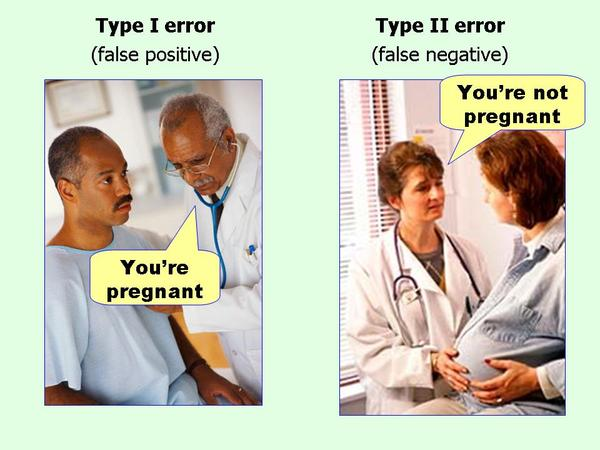

En los problemas de clasificación podemos obtener lo que se conoce cola matriz de confusión, que no deja de ser una manera de calcular los aciertos y los fallos y medir si los errores cometidos han sido de Tipo I o de Tipo II. La matriz de confusión permite calcular múltiples medidas, como se puede ver en la siguiente imagen: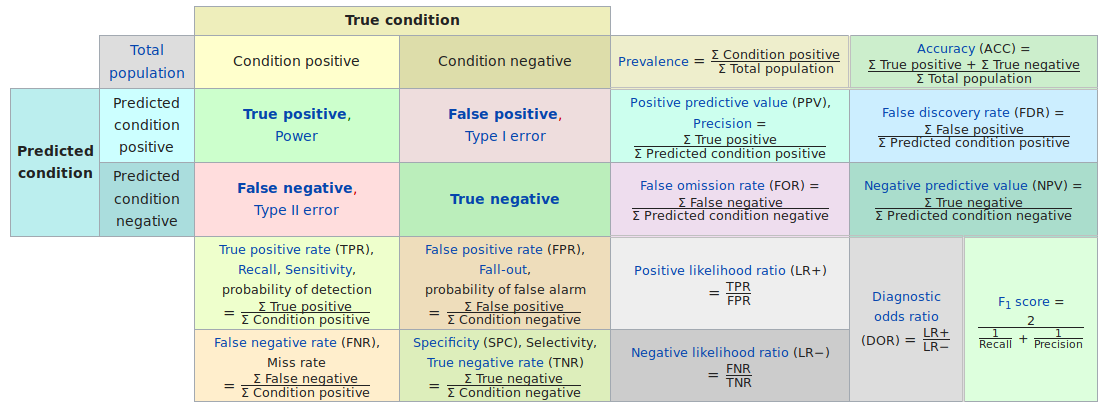

Vanmos a ver algunas de esas medidas con un par de ejemplos, en este caso usaremos dos problemas ya "cocinados" por el equipo de desarrolladores de `scikit-learn` como ejemplos pero se podría usar también el que veíamos anteriormente. También a modo de simplificación, usaremos todos los datos si bien ya sabemos que esto es una mala idea por motivos evidentes y en la vida real al menos debieramos de hacer un *hold-out* y testear el modelo contra este.

El primero de los problemas que vamos a utiulizar es un problema de clasificación binaria en el que se etiqueta a los diferentes pacientes entre sanos u enfermos. Veamos por lo tanto el reporte de la salida, la matriz de confusión y la metrica de *accuracy* que es de las más básicas.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report

bc_data = load_breast_cancer()

data = bc_data.data
target = bc_data.target

classifier = GaussianNB()
classifier.fit(data, target)

salida_pred = classifier.predict(datos)

print(classification_report(salida, salida_pred))
print(confusion_matrix(salida, salida_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(salida_pred,salida))

El segundo de los problemas tratados también es de clasificación y ya lo hemos visto antes que es el de clasificación de flores iris entre las tres variantes que existen, por lo que estamos hablando de un problema de clasificación multiclase. y vemos como cambia la salida de la matriz y el reporte.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report

iris_data = load_iris()

datos = iris_data.data
salida = iris_data.target

classifier = GaussianNB()
classifier.fit(datos, salida)

salida_pred = classifier.predict(datos)

print(classification_report(salida, salida_pred))
print(confusion_matrix(salida, salida_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(salida_pred,salida))

En general,`scikit-learn`ya nos provee de varios métodos que se pueden usar para el calculo de otras métricas con el fin de detectar posibles fallos o sesgos en nuestros modelos.

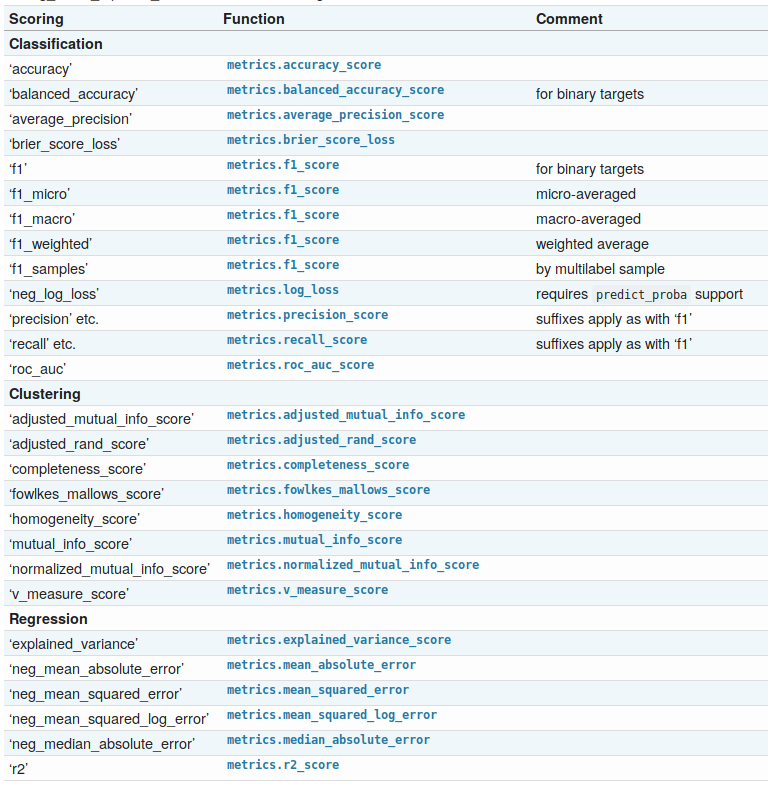

Es posible definir nuestras propias medidas y extraerlas del modelo: 

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate,cross_val_predict

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def score(y_true, y_pred): return accuracy_score(y_true, y_pred)

scoring = {'tp' : make_scorer(tp), 'tn' : make_scorer(tn),
           'fp' : make_scorer(fp), 'fn' : make_scorer(fn),
           'score': make_scorer(score)}

cv_results = cross_validate(classifier.fit(datos, salida), datos, salida,
                            scoring=scoring, cv=5,return_train_score=True)

print(cv_results['test_tp'])#hemos creado 4 scorer

sorted(cv_results.keys()) 
datos.shape

### Medidas de rendimiento más adecuadas en clasificación

Cabe destacar que muy pocas veces las medidas más simples, como *accuracy*, son adecuadas para evaluar el rendimiento de un modelo. Pensemos, por ejemplo, un problema que tenga un 90% de patrones posivos y un 10% de patrones negativos, un momdelo que diga siempre que sí tendría un *accuracy* del 90% cuando la clase que nos interesa detectar es la minoritaria. Por lo tanto, se necesita más información acerca del comportamiento real del modelo. 

Siguiendo este punto existen medidas combinadas que nos permiten tener en cuenta tanto el Error Tipo I como el Error Tipo II. Dentro de estas medidas, existen varios estudios que indican que el Área Bajo la Curva ROC (AUC) es una de las más robustas, aunque también son buenas medidas F1, kappa, sensibilidad o especificidad.

Sin embargo, el AUC tiene una peculiaridad. **Pregunta: ¿sabéis cuál es?**
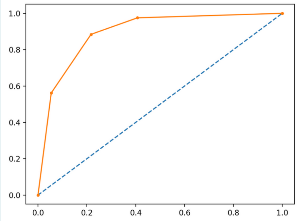

La curva se puede representar gráficamente y representa la tasa de falsos positivos contra la de verdaderos positivos para un número determinado de threshold entre 0.0 y 1.0. La tasa de verdaderos positivos también se conoce como sensibilidad y  la tasa de falsos negativos con la especifidad invertida (1- especificidad)

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
%matplotlib inline

bc = load_breast_cancer()
datos = bc.data
salida = bc.target

trainX, testX, trainy, testy = train_test_split(datos, salida, test_size=0.5, random_state=2)
# fit a model
model = KNeighborsClassifier(n_neighbors=3)
model.fit(trainX, trainy)

probs = model.predict_proba(testX)

# PREGUNTA: ¿Qué probabilidades nos quedamos?

probs = probs[:, 1]
print(probs)

auc = roc_auc_score(testy, probs)
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(testy, probs)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(fpr, tpr, marker='.')
pyplot.show()

En resumen:
+ las curvas ROC muestran el equilibrio entre la tasa de verdaderos y falsos positivos usando diferentes umbrales de probabilidad
+ las curvas Precision-Recall muestran el equilibrio entre la tasa de verdaderos positivos y el valor predictivo positvio usando diferentes umbrales de probabilidad
+ si los conjuntos de datos están desbalanceados es mejor usar la curva Precision-Recall


# Regresión
Al contrario de lo que ocurre con la classificaicón, los problemas de regresión no tienen una clase correcta si no que dan un valor específico. Por lo tanto las medidas vistas anteriormente darían poca información a cerca del rendimiento de un determinado modelo. Por poner un ejemplo, un modelo que ante un patrón que tiene por salida deseada 8, el *accuracy* sería el mismo para un modelo que nos da 8.1 que otro que nos da 8000, ambos han fallado. Es por ello que la matriz de confusión y las métricas vistas hasta este punto no son adecuadas llegado este momento.

### Medidas de rendimiento más adecuadas en regresión

En general para problemas de regresión, las medidas más utilizadas son *Mean Squared Error (MSE), Root Mean Squared Error (RMSE)* [web](https://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error), $R$ y $R^2$ [web](https://scikit-learn.org/stable/modules/model_evaluation.html#r2-score-the-coefficient-of-determination).

Véase un ejemplo con uno de los problemas de regresión preparados:

In [ ]:
import matplotlib.pylab as plt
import numpy as np
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
diabetes_dataset.data.shape

In [ ]:
diabetes_dataset.feature_names

In [ ]:
print(diabetes_dataset.DESCR)

No se ha comentado previamente pero uno de los modelos más simples, especialmente para la regresión, es la regresión lineal la cual asume un modelo en el que se cumple:

\begin{align}
y = X\beta + c + \epsilon
\end{align}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(diabetes_dataset.data, diabetes_dataset.target, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

PREGUNTA: ¿esto que da es bueno? ¿es malo? ¿qué es?

Si vamos a la documentación del modelo de regresión linal en la [web de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score) encontraremos la siguente descripción:

* Returns the coefficient of determination R^2 of the prediction. 

Por lo que, la regresión será mejor cuanto más cerca este de 1 y será peor cuanto más alejado este siendo 0 el peor resultado posible

In [ ]:
predicciones = model.predict(X_test)
error = abs(predicciones-y_test)
print(error[:15])

In [ ]:
error_dot = np.dot(error,error)
rmse=np.sqrt(error_dot/len(predicciones))
print(rmse)

PREGUNTA: ¿qué veis?

A mayores, en determinados modelos como este se pueden consultar algunos de los datos como pueden ser los coeficientes de la ecuación.

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [ ]:
model.predict(X_test)

Evidentemente podemos representar la regresión en el espacio

In [ ]:
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')
x = np.linspace(0, 300, 100)
y = x
plt.plot(x, y)
plt.show()

O inclusive cer como lo ha hecho en general

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(model.predict(X_train), model.predict(X_train)-y_train, c='b', s=40, alpha=0.5)
plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c='g', s=40)
plt.hlines(y=0, xmin=0, xmax=300)
plt.title("Residuals plot. Entrenamiento (azul), test (verde)")
plt.ylabel("Residuos")

In [ ]:
# Ya lo veremos más adelante pero uno de los puntos es que estas medidas 
#pueden variar si aplicamos normalizaciones o estandarizaciones, para tener en cuanta
# el cambio y no la cantidad en sí
from sklearn.preprocessing import StandardScaler
#X_train, X_test, y_train, y_test = train_test_split(diabetes_dataset.data, diabetes_dataset.target, test_size=0.2, random_state=42)
model = LinearRegression()
scaler = StandardScaler()
y_train=scaler.fit_transform(y_train.reshape(-1, 1))
y_test= scaler.fit_transform(y_test.reshape(-1, 1))

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
#Calculo manual del R²
predicciones = model.predict(X_test)
error_norm = abs(predicciones-y_test)
error_dot=np.dot(error_norm.T,error_norm)
rmse_norm=np.sqrt(error_dot/len(predicciones))
print(rmse_norm)

In [ ]:
y_pred = model.predict(X_test) 
plt.plot(y_test, y_pred, '.')
x = np.linspace(-2, 2, 2)
y = x
plt.plot(x, y)
plt.show()

PREGUNTA: Echad un ojo a lo que he hecho e intenrad darme una explicación



Básicamente, lo que pasa aquí es que:
+ R cuadrado es la proporción de variabilidad y explicada por el modelo de regresión. Es la raíz cuadrada de R
+ RMSE mide la desviación estándard de los residuos (cómo cuánto de separados están los puntos de la línea). Influye la dimensión de la variable de salida, aunque la dispersión de los puntos es igual.

PREGUNTA: entonces, ¿entre qué valores se mueve RMSE? ¿R cuadrado?

# Conclusiones finales

La evaluación del rendimiento de los algoritmos es importante en función de si el criterio o medida utilizados es lo suficientemente potente para discriminar un buen modelo u otro.

Es por esto que en general:

+ en clasificación se usan AUC, Recall-Precision, kappa o f1. Hemos mencionado que en general la más aceptada es AUC pero en función del tipo de datos que estemos estudiando, se podría optar por otras medidas como Recall-Precision.
+ en regresión R cuadrado es la medida más aceptada. Cuantifica la fuerza de la relación lineal entre datos normalmente distribuidos. Es la raíz del coeficiente de correlación de Pearson. Cuando las features no estén distribuidas siguiendo una normal, o la relación entre variables no sea lineal, se recomienda utilizar el coeficiente de correlación de Spearman. Podéis leer más acerca de esto [aquí](http://geoinfo.amu.edu.pl/qg/archives/2011/QG302_087-093.pdf)

Como se verá en siguientes notebook a la hora de seleccionar los mejores hiperparámetros de los modelos, así como los mismos modelos que mejor generalizan para cualquier problema, es crítico generar los resultados con una buena medida. 